In [25]:
# Importing pandas library for working with data sets
import pandas as pd

# Importing numpy library for working with arrays
import numpy as np

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing seaborn library for advanced visualization
import seaborn as sns

# Importing warnings for disable warnings from the code
import warnings
# To ignore the warnings
warnings.filterwarnings('ignore')
 

# Importing OneHotEncoder for encoding 
from sklearn.preprocessing import OneHotEncoder

# MinMaxScaler for feature scaling to bring values within a specific range
from sklearn.preprocessing import MinMaxScaler

# Importing train_test_split for splitting data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Importing DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

# Importing an ensemble model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing an advanced boosting model GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier 

# Importing an efficient and optimized version of gradient- XGBoost (Classifier)
from xgboost import XGBClassifier

# Importing SVC model from sklearn
from sklearn.svm import SVC

# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for hyperparameter tuning using randomized search
from sklearn.model_selection import RandomizedSearchCV

# Importing Multi-layer Perceptron (MLP) Classifier
from sklearn.neural_network import MLPClassifier

# Importing performance metrics for model evaluation
# accuracy_score,confusion_matrix,classification_report,etc.
from sklearn.metrics import *

### 1.Loading dataset

In [3]:
#loading dataset using pandas
data=pd.read_csv('preprocessed_data.csv')
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,-0.541458,1,2,2,5,13,2,0.102061,0.103000,...,1.185833,-0.157922,-0.688233,-1.064491,0.587144,0.771213,-0.979119,1.121693,0,3
1,E1001006,1.109888,1,2,2,5,13,2,0.591464,1.061145,...,1.185833,1.204942,-0.688233,0.365956,0.032653,0.771213,-0.121666,0.834907,0,3
2,E1001007,0.339260,1,1,1,5,13,1,-0.509693,1.061145,...,0.255768,1.204942,-0.688233,0.365956,2.065785,2.465670,-0.121666,2.268839,0,4
3,E1001009,0.449349,1,0,0,3,8,2,0.102061,1.061145,...,-0.674297,1.613801,-0.688233,-1.064491,2.527861,0.488804,2.193834,0.548120,0,3
4,E1001010,2.541054,1,2,2,5,13,2,0.836165,1.061145,...,1.185833,-0.157922,-1.663298,0.365956,-0.891498,-0.640834,0.379912,-0.599025,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,-1.091906,0,3,0,5,13,1,-0.754394,-1.813288,...,-0.674297,-0.703067,0.286832,0.365956,-0.152177,0.206394,-0.979119,-0.025452,0,4
1196,E100993,0.008991,1,1,2,1,15,2,0.102061,-0.855144,...,-1.604362,-0.975640,-0.688233,0.365956,-1.076328,-1.205653,-0.979119,-1.172598,0,3
1197,E100994,1.440157,1,3,1,1,15,2,2.304373,-1.813288,...,0.255768,1.204942,0.286832,0.365956,2.435446,1.053623,0.735787,1.121693,0,3
1198,E100995,-0.321278,0,3,2,0,1,2,-0.020290,0.103000,...,-0.674297,-0.294208,0.286832,1.796403,0.217484,0.771213,1.593239,0.834907,0,3


In [4]:
#dropping unique column EmpNumber
data.drop('EmpNumber',inplace=True,axis=1)

### 2.Data splitting 

In [9]:
#data splitting into feature and target
x=data.iloc[::,:-1:]
y=data['PerformanceRating']

In [14]:
#checking data is balanced 
data.PerformanceRating.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

Insight:this shows that the data is imbalanced 

In [16]:
# Importing train_test_split
from sklearn.model_selection import train_test_split
# Splitting training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
#importing and  Initializing SMOTE
from imblearn.over_sampling import SMOTE 
smote=SMOTE(random_state=42)

In [18]:
# fitting and resampling training data
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [19]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(1818, 26)
(1818,)


### 3.FEATURE EXTRACTION

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
pca_x_train=pca.fit_transform(x_train_smote)
pca_x_test=pca.transform(x_test)
print(pca_x_train.shape)
print(pca_x_test.shape)

(1818, 20)
(360, 20)


In [21]:
original_features = x_train_smote.columns
pca_loadings = pd.DataFrame(np.abs(pca.components_), columns=original_features)
important_features = pca_loadings.idxmax(axis=1)
print("Original features that contribute the most to each principal component:")
print(important_features)


Original features that contribute the most to each principal component:
0                       EmpJobRole
1     ExperienceYearsAtThisCompany
2                    EmpDepartment
3               NumCompaniesWorked
4              EducationBackground
5                    EmpDepartment
6               EmpJobSatisfaction
7                 DistanceFromHome
8      EmpRelationshipSatisfaction
9                EmpJobInvolvement
10              EmpWorkLifeBalance
11               EmpEducationLevel
12               EmpJobInvolvement
13              EmpJobSatisfaction
14           TrainingTimesLastYear
15              NumCompaniesWorked
16         BusinessTravelFrequency
17                   MaritalStatus
18                   MaritalStatus
19                             Age
dtype: object


## 4. Model Creation

#### 4.1 Logistic regression

In [26]:

log_model=LogisticRegression()
log_model.fit(pca_x_train,y_train_smote)
y_pred=log_model.predict(pca_x_test)
print(f' log_accuracy_score :{accuracy_score(y_test,y_pred)}\n')
print(f' log_confusion_matrix :{confusion_matrix(y_test,y_pred)}\n')
print(f' log_classification_report :{classification_report(y_test,y_pred)}')
log_accuracy=accuracy_score(y_test,y_pred)
print(log_accuracy)

 log_accuracy_score :0.7527777777777778

 log_confusion_matrix :[[ 39   8   2]
 [ 39 201  28]
 [  3   9  31]]

 log_classification_report :              precision    recall  f1-score   support

           2       0.48      0.80      0.60        49
           3       0.92      0.75      0.83       268
           4       0.51      0.72      0.60        43

    accuracy                           0.75       360
   macro avg       0.64      0.76      0.67       360
weighted avg       0.81      0.75      0.77       360

0.7527777777777778


### 4.2 DECISION TREE 

In [27]:
dt_model=DecisionTreeClassifier()
dt_model.fit(pca_x_train,y_train_smote)
y_pred=dt_model.predict(pca_x_test)
print(f' dt_accuracy_score :{accuracy_score(y_test,y_pred)}\n')
print(f' dt_confusion_matrix :{confusion_matrix(y_test,y_pred)}\n')
print(f' dt_classification_report :{classification_report(y_test,y_pred)}')

 dt_accuracy_score :0.6555555555555556

 dt_confusion_matrix :[[ 23  19   7]
 [ 39 190  39]
 [  5  15  23]]

 dt_classification_report :              precision    recall  f1-score   support

           2       0.34      0.47      0.40        49
           3       0.85      0.71      0.77       268
           4       0.33      0.53      0.41        43

    accuracy                           0.66       360
   macro avg       0.51      0.57      0.53       360
weighted avg       0.72      0.66      0.68       360



#### HYPERPARAMETER TUNING FOR DECISION TREE

In [28]:
params={'criterion':('gini','entropy'),
        'splitter':('best','random'),
        'max_depth':(list(range(1,10))),
        'min_samples_split':[1,2,3,4,5,6],
        'min_samples_leaf':(list(range(1,10)))}

In [29]:
dt_hpt_model=DecisionTreeClassifier()

In [30]:
dt_cv=RandomizedSearchCV(estimator=dt_hpt_model,
                   param_distributions=params,
                   scoring='accuracy',
                   n_jobs=-1,
                   verbose=3,
                   cv=5
                  ) 

In [31]:
dt_cv.fit(pca_x_train,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6],
                                        'splitter': ('best', 'random')},
                   scoring='accuracy', verbose=3)

In [32]:
print(f'Best_Params:{dt_cv.best_params_}')

Best_Params:{'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_depth': 9, 'criterion': 'entropy'}


In [38]:
best_dt = dt_cv.best_estimator_
dt_hp_pred = best_dt.predict(pca_x_test)
dt_hp_accuracy = accuracy_score(y_test, dt_hp_pred)
print(f"Test Accuracy: {dt_hp_accuracy}") 

Test Accuracy: 0.6


In [37]:
dt_cr=classification_report(y_test,dt_hp_pred)
print(dt_cr)

              precision    recall  f1-score   support

           2       0.29      0.57      0.38        49
           3       0.82      0.63      0.71       268
           4       0.35      0.47      0.40        43

    accuracy                           0.60       360
   macro avg       0.49      0.55      0.50       360
weighted avg       0.69      0.60      0.63       360



In [39]:
dt_cm=confusion_matrix(y_test,dt_hp_pred)
print(dt_cm)

[[ 28  16   5]
 [ 68 168  32]
 [  2  21  20]]


#### 4.3 RANDOM FOREST 

In [40]:
rf_model=RandomForestClassifier()
rf_model.fit(pca_x_train,y_train_smote)
y_pred=rf_model.predict(pca_x_test)
print(f' rf_accuracy_score :{accuracy_score(y_test,y_pred)}\n')
print(f' rf_confusion_matrix :{confusion_matrix(y_test,y_pred)}\n')
print(f' rf_classification_report :{classification_report(y_test,y_pred)}')

 rf_accuracy_score :0.7861111111111111

 rf_confusion_matrix :[[ 24  23   2]
 [ 19 237  12]
 [  1  20  22]]

 rf_classification_report :              precision    recall  f1-score   support

           2       0.55      0.49      0.52        49
           3       0.85      0.88      0.86       268
           4       0.61      0.51      0.56        43

    accuracy                           0.79       360
   macro avg       0.67      0.63      0.65       360
weighted avg       0.78      0.79      0.78       360



#### HYPERPARAMETER TUNING FOR RANDOM FOREST

In [41]:
params={'n_estimators':[100,200,300],
        'max_features':['auto','log2','sqrt'],
        'max_depth':list(range(1,11)),
        'min_samples_split':list(range(1,11)),
        'min_samples_leaf':[1,2,3,4,5]
       }

rf_hpt_model=RandomForestClassifier()
RF_CV=RandomizedSearchCV(estimator=rf_hpt_model,
                   param_distributions=params,
                   scoring='accuracy',
                   cv=3,
                   verbose=3,
                   n_jobs=-1
                  )

RF_CV.fit(pca_x_train,y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [42]:
print(f'Best_Params:{RF_CV.best_params_}')

Best_Params:{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 9}


In [43]:
best_rf = RF_CV.best_estimator_
rf_hp_pred = best_rf.predict(pca_x_test)
rf_hp_accuracy = accuracy_score(y_test, rf_hp_pred)
print(f"Test Accuracy: {rf_hp_accuracy}")

Test Accuracy: 0.7722222222222223


In [44]:
rf_cr=classification_report(y_test,rf_hp_pred)
print(rf_cr)

              precision    recall  f1-score   support

           2       0.49      0.59      0.54        49
           3       0.87      0.83      0.85       268
           4       0.58      0.60      0.59        43

    accuracy                           0.77       360
   macro avg       0.65      0.68      0.66       360
weighted avg       0.78      0.77      0.78       360



In [45]:
rf_cm=confusion_matrix(y_test,rf_hp_pred)
print(rf_cm)

[[ 29  17   3]
 [ 29 223  16]
 [  1  16  26]]


### 4.4 GRADIENT BOOSTING

In [46]:
gb_model=GradientBoostingClassifier()
gb_model.fit(pca_x_train,y_train_smote)
y_pred=gb_model.predict(pca_x_test)
print(f' gb_accuracy_score :{accuracy_score(y_test,y_pred)}\n')
print(f' gb_confusion_matrix :{confusion_matrix(y_test,y_pred)}\n')
print(f' gb_classification_report :{classification_report(y_test,y_pred)}')

 gb_accuracy_score :0.7944444444444444

 gb_confusion_matrix :[[ 34  11   4]
 [ 25 222  21]
 [  2  11  30]]

 gb_classification_report :              precision    recall  f1-score   support

           2       0.56      0.69      0.62        49
           3       0.91      0.83      0.87       268
           4       0.55      0.70      0.61        43

    accuracy                           0.79       360
   macro avg       0.67      0.74      0.70       360
weighted avg       0.82      0.79      0.80       360



### HYPERPARAMETER TUNING FOR GRADIENT BOOSTING

In [47]:
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'subsample': [0.6, 0.8, 1.0],  
    'max_features': ['auto', 'sqrt', 'log2']  
}


In [48]:
grid_search_gb = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=2 
)
grid_search_gb.fit(pca_x_train, y_train_smote)
print("Best Parameters:", grid_search_gb.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.3}


In [49]:
best_gb = grid_search_gb.best_estimator_
gb_hp_pred = grid_search_gb.predict(pca_x_test)
gb_hp_accuracy = accuracy_score(y_test, gb_hp_pred)
print(f"Test Accuracy: {gb_hp_accuracy:.4f}")

Test Accuracy: 0.8083


In [50]:
print(classification_report(y_test, gb_hp_pred))

              precision    recall  f1-score   support

           2       0.60      0.61      0.61        49
           3       0.86      0.88      0.87       268
           4       0.67      0.56      0.61        43

    accuracy                           0.81       360
   macro avg       0.71      0.68      0.70       360
weighted avg       0.81      0.81      0.81       360



In [51]:
print(confusion_matrix(y_test, gb_hp_pred))

[[ 30  18   1]
 [ 20 237  11]
 [  0  19  24]]


### 4.5 K-NEAREST NEIGHBOR (KNN)

In [52]:
knn_model=KNeighborsClassifier()
knn_model.fit(pca_x_train,y_train_smote)
y_pred=knn_model.predict(pca_x_test)
print(f' knn_accuracy_score :{accuracy_score(y_test,y_pred)}\n')
print(f' knn_confusion_matrix :{confusion_matrix(y_test,y_pred)}\n')
print(f' knn_classification_report :{classification_report(y_test,y_pred)}')

 knn_accuracy_score :0.5638888888888889

 knn_confusion_matrix :[[ 32  11   6]
 [ 71 140  57]
 [  4   8  31]]

 knn_classification_report :              precision    recall  f1-score   support

           2       0.30      0.65      0.41        49
           3       0.88      0.52      0.66       268
           4       0.33      0.72      0.45        43

    accuracy                           0.56       360
   macro avg       0.50      0.63      0.51       360
weighted avg       0.74      0.56      0.60       360



### HYPERPARAMETER TUNING FOR KNN

In [53]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn = KNeighborsClassifier()


In [54]:
knn_cv = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
knn_cv.fit(pca_x_train, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=1)

In [55]:
print(f"Best Parameters: {knn_cv.best_params_}")

Best Parameters: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean'}


In [56]:
best_knn = knn_cv.best_estimator_
knn_hp_pred = best_knn.predict(pca_x_test)
knn_hp_accuracy = accuracy_score(y_test, knn_hp_pred)
print(f"Test Accuracy: {knn_hp_accuracy:.4f}")

Test Accuracy: 0.5250


In [57]:
knn_cr=classification_report(y_test,knn_hp_pred)
print(knn_cr)

              precision    recall  f1-score   support

           2       0.30      0.69      0.42        49
           3       0.88      0.47      0.61       268
           4       0.28      0.67      0.40        43

    accuracy                           0.53       360
   macro avg       0.49      0.61      0.48       360
weighted avg       0.73      0.53      0.56       360



In [58]:
knn_cm=confusion_matrix(y_test,knn_hp_pred)
print(knn_cm)

[[ 34   9   6]
 [ 75 126  67]
 [  5   9  29]]


### 4.6 ARTIFICIAL NEURAL NETWORK (ANN)

In [59]:
ann_model=MLPClassifier()
ann_model.fit(pca_x_train,y_train_smote)
y_pred=ann_model.predict(pca_x_test)
print(f' ann_accuracy_score :{accuracy_score(y_test,y_pred)}\n')
print(f' ann_confusion_matrix :{confusion_matrix(y_test,y_pred)}\n')
print(f' ann_classification_report :{classification_report(y_test,y_pred)}')
ann_accuracy=accuracy_score(y_test,y_pred)

 ann_accuracy_score :0.8416666666666667

 ann_confusion_matrix :[[ 34  12   3]
 [ 14 240  14]
 [  1  13  29]]

 ann_classification_report :              precision    recall  f1-score   support

           2       0.69      0.69      0.69        49
           3       0.91      0.90      0.90       268
           4       0.63      0.67      0.65        43

    accuracy                           0.84       360
   macro avg       0.74      0.75      0.75       360
weighted avg       0.84      0.84      0.84       360



### 4.7 SUPPORT VECTOR CLASSIFIER (SVC)

In [60]:
svm_model=SVC()
svm_model.fit(pca_x_train,y_train_smote)
y_pred=svm_model.predict(pca_x_test)
print(f' svm_accuracy_score :{accuracy_score(y_test,y_pred)}\n')
print(f' svm_confusion_matrix :{confusion_matrix(y_test,y_pred)}\n')
print(f' svm_classification_report :{classification_report(y_test,y_pred)}')

 svm_accuracy_score :0.8194444444444444

 svm_confusion_matrix :[[ 37  10   2]
 [ 19 231  18]
 [  2  14  27]]

 svm_classification_report :              precision    recall  f1-score   support

           2       0.64      0.76      0.69        49
           3       0.91      0.86      0.88       268
           4       0.57      0.63      0.60        43

    accuracy                           0.82       360
   macro avg       0.71      0.75      0.72       360
weighted avg       0.83      0.82      0.82       360



### HYPERPARAMETER TUNING FOR SVC

In [61]:
params={'kernel':['linear','rbf'],
        'degree':[1,2,3,4,5],
        'gamma':['scale', 'auto'],
        'C':[0.1, 1, 10, 100]
        }
svc_hpt_model=SVC()
svc_cv=RandomizedSearchCV(estimator=svc_hpt_model,
                    param_distributions=params,
                    scoring='accuracy',
                    cv=5,verbose=3,
                    n_jobs=-1)
svc_cv.fit(pca_x_train,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy', verbose=3)

In [62]:
print(f'Best Parameters:{svc_cv.best_params_}')

Best Parameters:{'kernel': 'rbf', 'gamma': 'scale', 'degree': 1, 'C': 10}


In [63]:
best_svc = svc_cv.best_estimator_
svc_hp_pred = best_svc.predict(pca_x_test)
svc_hp_accuracy = accuracy_score(y_test, svc_hp_pred)
print(f"Test Accuracy: {svc_hp_accuracy:.4f}")

Test Accuracy: 0.8389


In [64]:
svc_cr=classification_report(y_test,svc_hp_pred)
print(svc_cr)

              precision    recall  f1-score   support

           2       0.71      0.76      0.73        49
           3       0.89      0.90      0.90       268
           4       0.63      0.56      0.59        43

    accuracy                           0.84       360
   macro avg       0.75      0.74      0.74       360
weighted avg       0.84      0.84      0.84       360



In [65]:
svc_cm=confusion_matrix(y_test,svc_hp_pred)
print(svc_cm)

[[ 37  12   0]
 [ 13 241  14]
 [  2  17  24]]


## MODEL COMPARISON REPORT

In [66]:
# Creating a dictionary for models and their f1 scores
comparison_dict = {'Model': ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','MLPClassifier','SVC'],
                   'accuracy_score': [log_accuracy,dt_hp_accuracy,rf_hp_accuracy,knn_hp_accuracy,ann_accuracy,svc_hp_accuracy]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

                 Model  accuracy_score
    LogisticRegression        0.752778
DecisionTreeClassifier        0.600000
RandomForestClassifier        0.772222
  KNeighborsClassifier        0.525000
         MLPClassifier        0.841667
                   SVC        0.838889


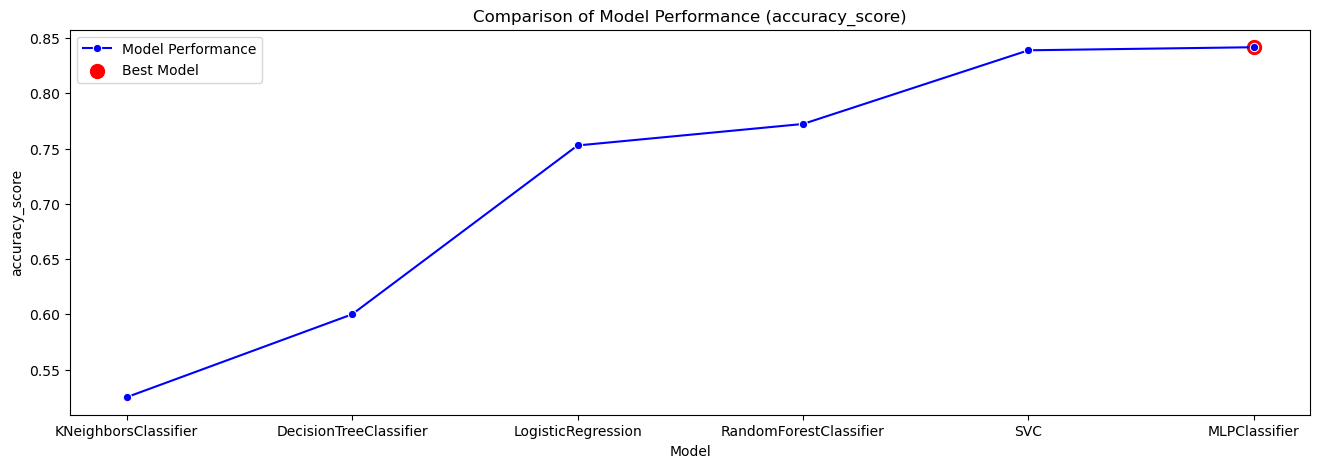

In [67]:
# Visualization
comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

# Conclusion

1.Best Model: MLPClassifier (84.17%), followed by SVC (83.89%)—both perform well for complex patterns.

2.RandomForest (77.22%) shows good results, benefiting from ensemble learning.

3.Logistic Regression (75.28%) is decent and interpretable.

4.Weakest Models: KNN (52.50%) & Decision Tree (60.00%), likely due to overfitting or sensitivity to noise.